<a href="https://colab.research.google.com/github/W-Srikongpan/DPDM2023/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preparation

In [90]:
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('/content/drive/MyDrive/DPDM2023_DATA/data-2.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
df = df[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold','SalePrice']]

    Missing Attribute Values: 73 cases (5%) have one or more missing values. The missing values from particular attributes are:

In [93]:
threshold = 0.05 * len(df)
missing_counts  = df.isnull().sum()
columns_with_more_than_5_percent_missing = missing_counts[missing_counts > threshold]
columns_with_more_than_5_percent_missing

LotFrontage    259
dtype: int64

In [94]:
df = df.drop(columns=['LotFrontage'])

In [95]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MoSold,YrSold,SalePrice
0,8450,7,5,2003,2003,2,2008,208500
1,9600,6,8,1976,1976,5,2007,181500
2,11250,7,5,2001,2002,9,2008,223500
3,9550,7,5,1915,1970,2,2006,140000
4,14260,8,5,2000,2000,12,2008,250000
...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,8,2007,175000
1456,13175,6,6,1978,1988,2,2010,210000
1457,9042,7,9,1941,2006,5,2010,266500
1458,9717,5,6,1950,1996,4,2010,142125


Define your features and target variable

In [96]:
x = df[['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold']]
y = df = df[['SalePrice']]

Split the dataset into a training set (80%) and a testing set (20%)


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Split the dataset into a training set (80%) and a validation set (20%)

In [98]:
from sklearn.model_selection import train_test_split
x_traintrain, x_val, y_traintrain, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=6)

#Select Model  

##Model 1

Import libraries

In [134]:
import pandas as pd
from sklearn.linear_model import LinearRegression

the linear regression mode

In [135]:
model1 = LinearRegression()
model1.fit(x_traintrain, y_traintrain)
y_pred1 = model1.predict(x_val)

In [136]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape1 = calculate_mape(y_val, y_pred1)
print("Mean Absolute Percentage Error (MAPE):", mape1)

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_val, y_pred1)
print("Mean Squared Error:", mse1)

Mean Absolute Percentage Error (MAPE): SalePrice    17.65397
dtype: float64
Mean Squared Error: 2117598090.4559238


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Evaluation

##Model2

Import libraries

In [179]:
from sklearn.linear_model import LogisticRegression

Logistic Regression model

In [180]:
model2 = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')  # Adjust hyperparameters as needed
model2.fit(x_traintrain, y_traintrain)
y_pred2 = model2.predict(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [181]:
# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(y_val, y_pred2)
print("Mean Squared Error:", mse2)

Mean Squared Error: 3997668344.3333335


##Model3

Import libraries

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

Decision Tree

In [186]:
Dtree = DecisionTreeClassifier(random_state = 0 , max_depth = 5 , min_samples_split=25 )
Dtree

DecisionTreeClassifier(max_depth=5, min_samples_split=25, random_state=0)

In [187]:
Dtree = Dtree.fit(x_traintrain,y_traintrain)
Dtree

DecisionTreeClassifier(max_depth=5, min_samples_split=25, random_state=0)

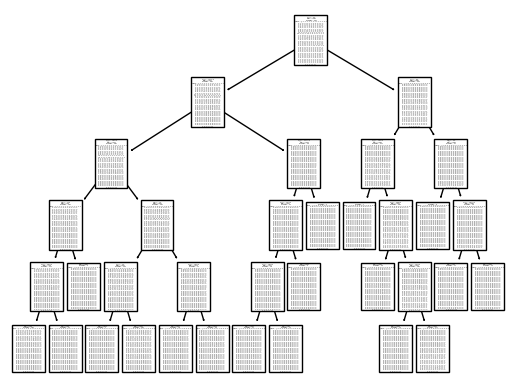

In [188]:
tree.plot_tree(Dtree);

In [191]:
y_pred3 = Dtree.predict(x_val)
accuracy_score(y_val, y_pred3)

0.004273504273504274

In [192]:
# Calculate Mean Squared Error (MSE)
mse3 = mean_squared_error(y_val, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 3506967596.9273505


#Evaluation  

In [137]:
model_full = LinearRegression()
model_full.fit(x_train, y_train)
y_pred_full = model_full.predict(x_test)

In [138]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape1 = calculate_mape(y_test, y_pred_full)
print("Mean Absolute Percentage Error (MAPE):", mape1)

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, y_pred_full)
print("Mean Squared Error:", mse1)

Mean Absolute Percentage Error (MAPE): SalePrice    18.31454
dtype: float64
Mean Squared Error: 2467605562.649429


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


    Select Model1 is Linear Regression model. it is best model for this data. Because this model have Mean Squared Error (MASE) least from all model

    Mean Absolute Percentage Error (MAPE): SalePrice    18.31454  

    Mean Squared Error: 2467605562.649429
